# <center>__MÉTODOS NUMÉRICOS__</center>
## <center>__PROJETO DA UNIDADE 2__</center>

#### <center>__Equipe:__</center>
#### <center>__Alessandro Lucas__</center>
#### <center>__Kevin Ryan__</center>
#### <center>__Thiago Barbosa__</center>

#1 - INTRODUÇÃO

A recomendação de músicas é um dos campos mais explorados dentro dos sistemas de recomendação, com grande aplicação em plataformas como Spotify, Apple Music e YouTube. O objetivo principal de um sistema de recomendação musical é sugerir músicas aos usuários com base em características objetivas das músicas, como ritmo, intensidade, e até mesmo o estilo musical. Em nosso projeto, abordamos um sistema de recomendação baseado em conteúdo, ou seja, o sistema irá recomendar músicas com base nas características intrínsecas das faixas, como danceability, energy, acousticness, entre outras.

Para a construção deste sistema, utilizamos a técnica de similaridade de cosseno, que mede a similaridade entre vetores de atributos musicais. A ideia é calcular a distância entre as músicas no espaço das características, de forma que as músicas mais próximas entre si no espaço multidimensional de atributos serão consideradas mais semelhantes e, portanto, mais recomendadas umas às outras.

Além disso, exploramos o uso do algoritmo KNN (K-Nearest Neighbors), que é uma técnica comum para encontrar os vizinhos mais próximos de um dado ponto em um conjunto de dados. O KNN pode ser combinado com diferentes métricas de distância, como cosseno, euclidiana e manhattan, permitindo flexibilidade para ajustar o modelo de recomendação de acordo com as necessidades do usuário.

#2 - DESCRIÇÃO DO PROBLEMA

O problema que estamos tentando resolver é o de recomendação musical personalizada, baseado nas características de conteúdo das faixas musicais. O desafio principal reside em identificar e sugerir músicas que sejam semelhantes àquela que o usuário já demonstrou interesse.

Para isso, a solução precisa ser capaz de:

1. Analisar as características musicais de cada faixa (como energia, dançabilidade, acústica, etc.) de forma eficiente.
2. Medir a similaridade entre as faixas, ou seja, como de perto ou longe as faixas estão no espaço de características.
3. Recomendar as faixas mais semelhantes para o usuário, considerando a música de entrada como base.

Este tipo de sistema pode ser aplicado em uma variedade de contextos, como:
- Plataformas de Streaming de Música: Recomendando músicas para usuários com base no que eles já ouviram.
- Análise de Gêneros Musicais: Agrupando músicas similares em gêneros, para facilitar a exploração musical.
- Descoberta de Música: Ajudando usuários a descobrir novas músicas ou artistas semelhantes aos que eles já conhecem.

Esse tipo de recomendação se torna particularmente útil em um mundo onde a quantidade de músicas disponíveis é gigantesca, e os usuários podem se perder ao tentar encontrar novas faixas que se alinhem aos seus gostos pessoais.

#3 - MÉTODOS APLICADOS À SOLUÇÃO

Para resolver o problema descrito acima, aplicamos os seguintes métodos numéricos:

#### 1. Similaridade de Cosseno

A similaridade de cosseno é uma métrica amplamente utilizada para medir a similaridade entre dois vetores em um espaço vetorial. No contexto de nosso projeto, ela é utilizada para calcular a semelhança entre as músicas com base em suas características musicais. O valor de similaridade de cosseno varia entre -1 e 1, onde 1 indica que os dois vetores são idênticos e 0 indica que não há similaridade entre eles.

- Como funciona: A similaridade de cosseno é calculada como o cosseno do ângulo entre dois vetores em um espaço multidimensional. No nosso caso, os vetores representam as características de cada música.
- Para que tipos de problemas é útil: A similaridade de cosseno é útil quando se lida com dados que não têm unidades físicas claras (como as características de uma música), mas em que a direção ou o padrão de comportamento é importante.
- Por que é útil para este problema: Como as músicas podem ter características muito diferentes em termos de escala (por exemplo, a loudness pode variar muito em comparação com a danceability), a similaridade de cosseno ajuda a neutralizar as diferenças de escala e comparar apenas as direções dos vetores.

#### 2. KNN (K-Nearest Neighbors)

O K-Nearest Neighbors (KNN) é um algoritmo de aprendizado supervisionado usado para classificação e regressão, mas também é bastante útil em problemas de recomendação. Em nosso caso, ele é utilizado para encontrar as músicas mais próximas de uma música alvo em termos de características musicais.

- Como funciona: O KNN calcula a distância entre o ponto (música) de entrada e todos os outros pontos no espaço de características e, em seguida, seleciona os k vizinhos mais próximos para realizar uma recomendação.
- Para que tipos de problemas é útil: KNN é útil quando a relação entre as instâncias de dados é importante e não há um modelo paramétrico claro a ser aprendido. Ele funciona bem em problemas de recomendação, onde o objetivo é encontrar os itens mais semelhantes a um dado item.
- Por que é útil para este problema: O KNN oferece uma maneira simples e eficaz de encontrar músicas semelhantes, considerando um número fixo de vizinhos. Além disso, ele pode ser facilmente adaptado para usar diferentes métricas de distância (como cosseno, euclidiana, manhattan), o que oferece flexibilidade no ajuste do modelo de recomendação.

#### 3. Normalização de Dados

A normalização de dados é um pré-processamento essencial, especialmente quando as variáveis de entrada (no nosso caso, as características das músicas) possuem escalas muito diferentes. O StandardScaler foi utilizado para transformar os dados para que todas as variáveis tenham média zero e desvio padrão igual a um.

- Como funciona: O StandardScaler subtrai a média e divide pelo desvio padrão, o que torna as variáveis comparáveis entre si.
- Por que é útil: Sem a normalização, as características com escalas maiores (como loudness) dominariam o cálculo de similaridade, tornando as outras características irrelevantes. A normalização assegura que todas as características contribuam igualmente para a análise de similaridade.

In [ ]:
# Célula 1: Importação de Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Configurações para os gráficos
%matplotlib inline
sns.set(style="whitegrid")


# Sistema de Recomendação de Músicas (Baseado em Conteúdo)

Este notebook demonstra os passos para construir um sistema de recomendação de músicas utilizando apenas as características (features) do conteúdo das músicas. O fluxo do projeto inclui:

1. Leitura e exploração do dataset.
2. Seleção e pré-processamento das features relevantes.
3. Cálculo da similaridade entre as músicas.
4. Implementação de uma função de recomendação que retorna as músicas mais similares a uma faixa de interesse.





In [ ]:
# Célula 2: Carregamento do Dataset
df = pd.read_csv('data.csv')
print("Número de registros:", len(df))
df.head()


Número de registros: 169907


,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,0gNNToCW3qjabgTyBSjt3H,!Que Vida! - Mono Version,['Love'],220560,11/1/66,1966,0.5250,0.600,0.540,0.00305,0.100,-11.803,0.0328,125.898,0.547,1,9,26,0
1,0tMgFpOrXZR6irEOLNWwJL,"""40""",['U2'],157840,2/28/83,1983,0.2280,0.368,0.480,0.70700,0.159,-11.605,0.0306,150.166,0.338,1,8,21,0
2,2ZywW3VyVx6rrlrX75n3JB,"""40"" - Live",['U2'],226200,8/20/83,1983,0.0998,0.272,0.684,0.01450,0.946,-9.728,0.0505,143.079,0.279,1,8,41,0
3,6DdWA7D1o5TU2kXWyCLcch,"""40"" - Remastered 2008",['U2'],157667,2/28/83,1983,0.1850,0.371,0.545,0.58200,0.183,-9.315,0.0307,150.316,0.310,1,8,37,0
4,3vMmwsAiLDCfyc1jl76lQE,"""40"" - Remastered 2008",['U2'],157667,2/28/83,1983,0.1850,0.371,0.545,0.58200,0.183,-9.315,0.0307,150.316,0.310,1,8,35,0


## Análise Exploratória dos Dados

Nesta etapa, vamos visualizar algumas informações básicas sobre o dataset e identificar os atributos disponíveis.


In [ ]:
# Célula 3: Informações Gerais do Dataset
df.info()

# Estatísticas descritivas das colunas numéricas
df.describe()

# Filtrando apenas para ano > 2020
df = df[df["year"] >= 2000]

# Removendo tabelas que não serão usadas
df.drop(["id", "release_date", "liveness"], axis=1, inplace=True)

# Removendo músicas duplicadas
df.drop_duplicates(subset=['name', 'artists'], inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169907 entries, 0 to 169906
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                169907 non-null  object 
 1   name              169907 non-null  object 
 2   artists           169907 non-null  object 
 3   duration_ms       169907 non-null  int64  
 4   release_date      169907 non-null  object 
 5   year              169907 non-null  int64  
 6   acousticness      169907 non-null  float64
 7   danceability      169907 non-null  float64
 8   energy            169907 non-null  float64
 9   instrumentalness  169907 non-null  float64
 10  liveness          169907 non-null  float64
 11  loudness          169907 non-null  float64
 12  speechiness       169907 non-null  float64
 13  tempo             169907 non-null  float64
 14  valence           169907 non-null  float64
 15  mode              169907 non-null  int64  
 16  key               16

## Seleção dos Atributos Relevantes

Para recomendação baseada em conteúdo, vamos utilizar os atributos que descrevem as características musicais. No nosso caso, selecionaremos as seguintes colunas:
- **Year:** Indica o ano de lançamento da música.
- **danceability:** Indica a capacidade de dançar (0 a 1).
- **energy:** Representa a intensidade da música (0 a 1).
- **acousticness:** Probabilidade da música ser acústica (0 a 1).
- **instrumentalness:** Grau de ausência de vocais (0 a 1).
- **liveness:** Probabilidade de ter sido gravada ao vivo (0 a 1).
- **loudness:** Média de volume da faixa (em decibéis).
- **speechiness:** Presença de palavras faladas (0 a 1).
- **tempo:** Tempo em BPM.
- **valence:** Grau de positividade da música (0 a 1).
- **key:** Representa a tonalidade da música (0 a 11).
- **explicit:** Presença de letra explicita (+18) na música (0= não ou 1 = sim)

Vamos criar um DataFrame com essas features e manter também algumas informações (como nome e artista) para identificação posterior.


In [ ]:
# Célula 4: Seleção das Features e dados auxiliares
features = ['year', 'danceability', 'energy', 'acousticness', 'instrumentalness',
            'loudness', 'speechiness', 'tempo', 'valence', 'key', 'explicit']

# Cria um DataFrame para as features numéricas
df_features = df[features].copy()

# Cria um DataFrame com informações auxiliares para exibição
df_info = df[['name', 'artists']].copy()

print("Features selecionadas:")
print(df_features.head())


Features selecionadas:
    year  danceability  energy  acousticness  instrumentalness  loudness  \
5   2012         0.315   0.970      0.000696           0.00000    -4.709   
19  2005         0.264   0.951      0.000894           0.04420    -7.356   
51  2007         0.609   0.917      0.006140           0.00002    -2.563   
57  2002         0.690   0.592      0.023600           0.00000    -5.973   
60  2007         0.635   0.647      0.000256           0.00132    -7.055   

    speechiness    tempo  valence  key  explicit  
5        0.1020  178.068    0.423    8         0  
19       0.1460  149.990    0.159    7         0  
51       0.0477  149.948    0.670    9         0  
57       0.3000  179.980    0.466    7         1  
60       0.0235   94.196    0.464    7         0  


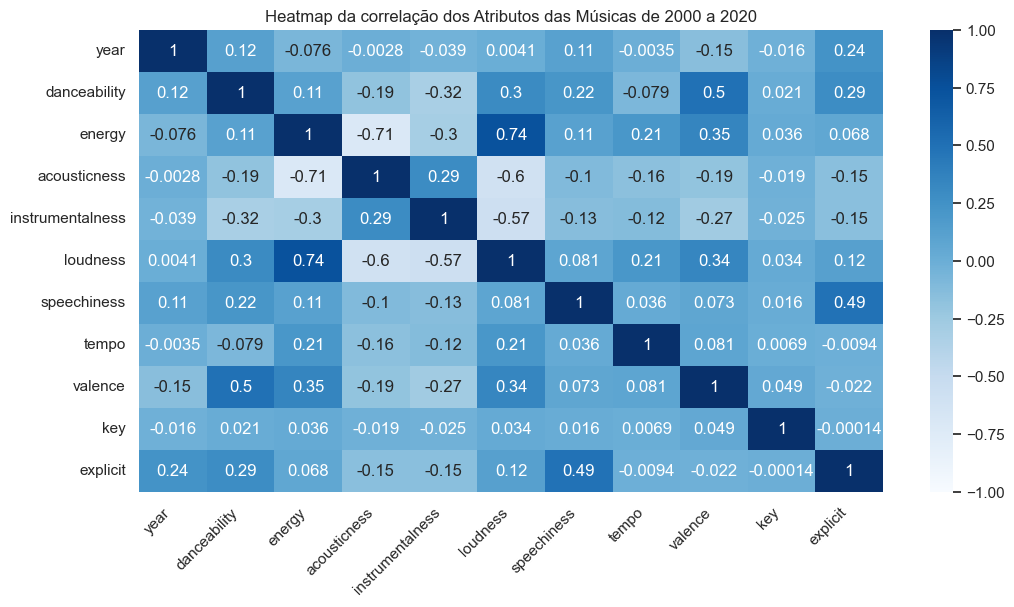

In [ ]:
# Plotar o heatmap da correlação dos atributos das músicas
plt.figure(figsize=(12, 6))
sns.heatmap(df_features.corr(), vmin=-1, vmax=1, annot=True, cmap="Blues")
plt.title(f"Heatmap da correlação dos Atributos das Músicas de 2000 a 2020")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


<section>
        <h2>Definição de Correlação</h2>
        <p>A correlação mede a força e a direção da relação linear entre duas variáveis. A fórmula da correlação de Pearson entre duas variáveis \( X \) e \( Y \) é dada por:</p>
        <p>\[
        \rho(X, Y) = \frac{Cov(X, Y)}{\sigma_X \sigma_Y}
        \]</p>
        <h2>Álgebra Linear por trás da Correlação</h2>
        <h3>Matriz de Covariância</h3>
            <p>A covariância entre duas variáveis \( X \) e \( Y \) é calculada como:</p>
            <p>\[
            Cov(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})
            \]</p>
            <p>Se tivermos um conjunto de dados com várias variáveis, podemos organizar essas covariâncias em uma matriz simétrica chamada matriz de covariância \( \Sigma \):</p>
            <p>
            \Sigma = \begin{bmatrix}
            Cov(X_1, X_1) & Cov(X_1, X_2) & \cdots & Cov(X_1, X_p) \\
            Cov(X_2, X_1) & Cov(X_2, X_2) & \cdots & Cov(X_2, X_p) \\
            \vdots & \vdots & \ddots & \vdots \\
            Cov(X_p, X_1) & Cov(X_p, X_2) & \cdots & Cov(X_p, X_p)
            \end{bmatrix}
            </p>
            <h3>Normalização</h3>
            <p>Para obter a matriz de correlação, cada elemento da matriz de covariância é dividido pelo produto dos desvios padrão das variáveis correspondentes:</p>
            <p>\[
            Corr(X, Y) = \frac{Cov(X, Y)}{\sqrt{Cov(X, X) \times Cov(Y, Y)}}
            \]</p>

## Pré-processamento: Normalização dos Dados

Como as escalas dos atributos podem ser diferentes (por exemplo, "loudness" pode estar em uma escala negativa e "danceability" varia entre 0 e 1), vamos normalizar os dados utilizando o StandardScaler.


In [ ]:
# Célula 5: Normalização dos dados
scaler = StandardScaler()
X = scaler.fit_transform(df_features)

print("Forma dos dados normalizados:", X.shape)
X


Forma dos dados normalizados: (39299, 11)


array([[ 0.34329763, -1.57476595,  1.44693312, ..., -0.28844839,
         0.77252357, -0.53880509],
       [-0.81751134, -1.86736108,  1.36331014, ..., -1.3423311 ,
         0.49286547, -0.53880509],
       [-0.48585164,  0.11195895,  1.213669  , ...,  0.69757067,
         1.05218166, -0.53880509],
       ...,
       [ 1.17244689,  1.43150563,  1.14765085, ...,  0.57381929,
        -1.18508313, -0.53880509],
       [ 0.67495733,  0.78894377,  1.01121334, ...,  0.74148245,
         1.33183976, -0.53880509],
       [-0.15419193, -0.38143677,  0.87917704, ..., -0.44812759,
         1.33183976, -0.53880509]])

## Cálculo de Similaridade

Utilizaremos a similaridade de cosseno para calcular a proximidade entre as músicas com base nos vetores de atributos normalizados.


In [ ]:
# Célula 6: Cálculo da Matriz de Similaridade
similarity_matrix = cosine_similarity(X)
print("Matriz de Similaridade calculada. Exemplo dos primeiros 5 valores da primeira linha:")
print(similarity_matrix[0][:5])

Matriz de Similaridade calculada. Exemplo dos primeiros 5 valores da primeira linha:
[ 1.          0.80554518  0.66521078  0.19697499 -0.09450523]


<h3> Matriz de Similaridade</h3>
<p>Quando aplicada a um conjunto de vetores (organizados em uma matriz \( X \)), a similaridade do cosseno é calculada para todos os pares de vetores, resultando em uma matriz de similaridade \( S \):</p>
<p>\[
S = \begin{bmatrix}
\text{cosine\_similarity}(X_1, X_1) & \text{cosine\_similarity}(X_1, X_2) & \cdots & \text{cosine\_similarity}(X_1, X_n) \\
\text{cosine\_similarity}(X_2, X_1) & \text{cosine\_similarity}(X_2, X_2) & \cdots & \text{cosine\_similarity}(X_2, X_n) \\
\vdots & \vdots & \ddots & \vdots \\
\text{cosine\_similarity}(X_n, X_1) & \text{cosine\_similarity}(X_n, X_2) & \cdots & \text{cosine\_similarity}(X_n, X_n)
\end{bmatrix}
\]</p>
<p>Essa matriz é simétrica, pois a similaridade entre \( X_i \) e \( X_j \) é a mesma que entre \( X_j \) e \( X_i \).</p>

<h2>Métodos Numéricos no Cálculo da Similaridade</h2>
<h3> Normalização dos Vetores</h3>
<p>Para calcular a similaridade do cosseno, os vetores são normalizados para terem norma unitária. Isso é feito dividindo cada vetor por sua norma:</p>
<p>\[
A_{\text{normalizado}} = \frac{A}{\|A\|}
\]</p>
<p>Essa etapa é crucial para simplificar o cálculo e garantir que a similaridade seja baseada apenas na direção dos vetores, e não em sua magnitude.</p>

<h3> Multiplicação de Matrizes</h3>
<p>Após a normalização, a matriz de similaridade é obtida multiplicando a matriz normalizada \( X_{\text{normalizada}} \) pela sua transposta \( X_{\text{normalizada}}^T \):</p>
<p>\[
S = X_{\text{normalizada}} \times X_{\text{normalizada}}^T
\]</p>
<p>Essa operação é altamente eficiente e aproveita técnicas de álgebra linear para cálculos rápidos, especialmente em grandes conjuntos de dados.</p>

<h3> Otimização Numérica</h3>
<p>Funções como `cosine_similarity` utilizam métodos numéricos otimizados, como vetorização e paralelização, para garantir que o cálculo seja escalável e eficiente, mesmo para matrizes de grandes dimensões.</p>


## Função de Recomendação

Criaremos uma função que, dado o índice de uma música, retorna as N músicas mais similares (excluindo a própria música).


In [ ]:
similarity_matrix

array([[ 1.        ,  0.80554518,  0.66521078, ..., -0.02592361,
         0.26499032,  0.67042476],
       [ 0.80554518,  1.        ,  0.38690309, ..., -0.32041275,
        -0.06622432,  0.58608031],
       [ 0.66521078,  0.38690309,  1.        , ...,  0.26325324,
         0.60561822,  0.50438488],
       ...,
       [-0.02592361, -0.32041275,  0.26325324, ...,  1.        ,
         0.39032385, -0.12684001],
       [ 0.26499032, -0.06622432,  0.60561822, ...,  0.39032385,
         1.        ,  0.52595703],
       [ 0.67042476,  0.58608031,  0.50438488, ..., -0.12684001,
         0.52595703,  1.        ]])

<h2>Definição do K-Nearest Neighbors (KNN)</h2>
<p>O K-Nearest Neighbors (KNN) é um algoritmo de aprendizado de máquina supervisionado usado para classificação e regressão. Ele funciona com base na ideia de que objetos semelhantes estão próximos uns dos outros no espaço de características. Dado um novo ponto de dados, o KNN encontra os \( k \) vizinhos mais próximos no conjunto de treinamento e faz uma previsão com base nesses vizinhos.</p>

<h2>Álgebra Linear e Métodos Numéricos no KNN</h2>
<h3>Distância Euclidiana</h3>
<p>A distância euclidiana é a métrica mais comum usada no KNN para medir a proximidade entre dois pontos. Para dois pontos \( P \) e \( Q \) em um espaço \( n \)-dimensional, a distância euclidiana é calculada como:</p>
<p>\[
d(P, Q) = \sqrt{\sum_{i=1}^{n} (P_i - Q_i)^2}
\]</p>
<p>Essa fórmula é derivada do teorema de Pitágoras e é fundamental para o cálculo de distâncias no KNN.</p>

<h3>Similaridade do Cosseno</h3>
<p>Além da distância euclidiana, outra métrica comum usada no KNN é a **similaridade do cosseno**. Essa métrica mede o cosseno do ângulo entre dois vetores, o que indica a similaridade em termos de direção, independentemente de sua magnitude. A fórmula da similaridade do cosseno entre dois vetores \( A \) e \( B \) é dada por:</p>
<p>\[
\text{cosine\_similarity}(A, B) = \frac{A \cdot B}{\|A\| \|B\|}
\]</p>
<p>Onde:</p>
<ul>
    <li>\( A \cdot B \) é o produto escalar entre os vetores \( A \) e \( B \).</li>
    <li>\( \|A\| \) e \( \|B\| \) são as normas (comprimentos) dos vetores \( A \) e \( B \), respectivamente.</li>
</ul>
<p>A similaridade do cosseno é especialmente útil em dados onde a magnitude dos vetores não é relevante, como em textos (TF-IDF) ou recomendações.</p>

<h3>Matriz de Distâncias ou Similaridades</h3>
<p>Dado um conjunto de dados de treinamento com \( m \) amostras e um conjunto de teste com \( n \) amostras, podemos calcular uma matriz de distâncias (ou similaridades) \( D \), onde cada elemento \( D_{ij} \) representa a distância ou similaridade entre a amostra \( i \) do conjunto de teste e a amostra \( j \) do conjunto de treinamento:</p>
<p>\[
D = \begin{bmatrix}
d(X_1^{\text{teste}}, X_1^{\text{treino}}) & d(X_1^{\text{teste}}, X_2^{\text{treino}}) & \cdots & d(X_1^{\text{teste}}, X_m^{\text{treino}}) \\
d(X_2^{\text{teste}}, X_1^{\text{treino}}) & d(X_2^{\text{teste}}, X_2^{\text{treino}}) & \cdots & d(X_2^{\text{teste}}, X_m^{\text{treino}}) \\
\vdots & \vdots & \ddots & \vdots \\
d(X_n^{\text{teste}}, X_1^{\text{treino}}) & d(X_n^{\text{teste}}, X_2^{\text{treino}}) & \cdots & d(X_n^{\text{teste}}, X_m^{\text{treino}})
\end{bmatrix}
\]</p>
<p>Essa matriz é essencial para identificar os \( k \) vizinhos mais próximos. Quando a métrica é a similaridade do cosseno, os valores mais altos indicam maior similaridade.</p>

<h3>Seleção dos \( k \) Vizinhos Mais Próximos</h3>
<p>Para cada ponto no conjunto de teste, o KNN seleciona os \( k \) pontos no conjunto de treinamento com as menores distâncias (ou maiores similaridades). Esses pontos são usados para fazer a previsão:</p>
<ul>
    <li>Para **classificação**, a classe mais frequente entre os \( k \) vizinhos é atribuída ao ponto de teste.</li>
    <li>Para **regressão**, a média (ou mediana) dos valores dos \( k \) vizinhos é usada como previsão.</li>
</ul>

<h2>Métodos Numéricos no KNN</h2>
<h3>Cálculo Eficiente de Distâncias ou Similaridades</h3>
<p>O cálculo de distâncias ou similaridades entre todos os pares de pontos pode ser computacionalmente caro para grandes conjuntos de dados. Para otimizar esse processo, são utilizadas técnicas como:</p>
<ul>
    <li><strong>Vetorização</strong>: Operações matriciais são usadas para calcular distâncias ou similaridades de forma eficiente, aproveitando bibliotecas como NumPy.</li>
    <li><strong>Estruturas de Dados</strong>: Estruturas como KD-Trees ou Ball Trees são usadas para organizar os dados de forma a reduzir o número de cálculos necessários.</li>
</ul>

<h3>Normalização dos Dados</h3>
<p>Como o KNN é sensível à escala das features, é comum normalizar os dados antes de aplicar o algoritmo. A normalização pode ser feita usando:</p>
<p>\[
X_{\text{normalizado}} = \frac{X - \mu}{\sigma}
\]</p>
<p>Onde \( \mu \) é a média e \( \sigma \) é o desvio padrão das features.</p>

<h3>Paralelização</h3>
<p>Para conjuntos de dados muito grandes, o cálculo das distâncias ou similaridades pode ser paralelizado, distribuindo o trabalho entre múltiplos núcleos de processamento ou máquinas.</p>



In [ ]:
# Célula 7: Função de recomendação com porcentagem de similaridade
def recommend_songs(song_index, n=10):
    """
    Retorna um DataFrame com as n músicas mais similares à música no índice song_index,
    incluindo a porcentagem de similaridade.
    """
    # Obter os scores de similaridade para a música de interesse
    similarity_scores = list(enumerate(similarity_matrix[song_index]))

    # Ordenar por similaridade (do maior para o menor)
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    print(f"🎵 Música analisada: {df_info.iloc[song_index]['name']} - {df_info.iloc[song_index]['artists']}")

    # Ignorar a primeira entrada (a própria música)
    recommended_indices = [i for i, score in similarity_scores[1:n+1]]

    # Calcular as porcentagens de similaridade
    similarity_percentages = [(score * 100) for _, score in similarity_scores[1:n+1]]

    # Criar DataFrame com as músicas recomendadas
    recommendations = df_info.iloc[recommended_indices].copy()
    recommendations['similarity (%)'] = [f"{sim:.2f}%" for sim in similarity_percentages]

    return recommendations

# Teste: Recomendar 10 músicas similares à primeira música (índice 0)
print("🔍 Recomendações para a música no índice 0 utilizando similaridade de Cosseno:")
music_index = 937
num_neighbors = 10
recommendations = recommend_songs(music_index, n=num_neighbors)
recommendations


🔍 Recomendações para a música no índice 0 utilizando similaridade de Cosseno:
🎵 Música analisada: ART IS DEAD - ['Bo Burnham']


,name,artists,similarity (%)
47362,Fuck The Po-Po - Live,['Corey Smith'],92.74%
154612,Walcott,['Vampire Weekend'],91.09%
9228,Another Night,['Mac Miller'],89.20%
145177,This Is My Version,['Conor Maynard'],87.27%
141914,The Resistance,['Drake'],87.13%
43832,Feathered Indians,['Tyler Childers'],86.63%
88781,Meant to Be Yours,"['Ryan McCartan', 'Barrett Wilbert Weed', 'Mic...",86.27%
117108,SUMMER,['BROCKHAMPTON'],86.27%
90899,Mirror,"['Lil Wayne', 'Bruno Mars']",86.24%
165655,rock + roll,['EDEN'],86.19%


## Conclusão

Neste notebook, desenvolvemos um sistema de recomendação de músicas baseado em conteúdo. Os passos incluíram:

- Leitura e exploração do dataset.
- Seleção e normalização das features musicais.
- Cálculo da similaridade de cosseno entre os vetores de atributos.
- Implementação de uma função que retorna as músicas mais similares a uma faixa de interesse.

Você pode aprimorar este sistema testando com outros conjuntos de atributos ou ajustando a métrica de similaridade. Esse projeto serve como base para um sistema robusto de recomendação baseado em conteúdo.

Experimente escolher outras músicas (usando diferentes índices) e veja se as recomendações fazem sentido. Se precisar de mais ajustes ou tiver dúvidas, estou à disposição para ajudar!


In [ ]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd

# KNN com métrica Euclidiana
knn_euclidean = NearestNeighbors(n_neighbors=neighbors, metric='euclidean')
knn_euclidean.fit(X)

# KNN com métrica Cosseno
knn_cosine = NearestNeighbors(n_neighbors=neighbors, metric='cosine')
knn_cosine.fit(X)

# Função de recomendação com KNN
def recommend_knn(song_index, n=5, metric='euclidean'):
    print(f"🎵 Música analisada: {df_info.iloc[song_index]['name']} - {df_info.iloc[song_index]['artists']}")

    if metric == 'euclidean':
        distances, indices = knn_euclidean.kneighbors([X[song_index]])
    elif metric == 'cosine':
        distances, indices = knn_cosine.kneighbors([X[song_index]])

    recommended_indices = indices[0][1:n]  # Ignorar a própria música

    similarity_percentages = [(1 - distances[0][i]) * 100 for i in range(1, n)]

    recommendations = df_info.iloc[recommended_indices].copy()
    recommendations['similarity (%)'] = [f"{sim:.2f}%" for sim in similarity_percentages]

    return recommendations

# Criar DataFrame para ambas as métricas
music_index = 27650
num_neighbors = 10

print("🔍 Recomendação usando KNN (Euclidiana):")
df_euclidean = recommend_knn(music_index, n=num_neighbors, metric='euclidean')
print(df_euclidean)

print("\n🔍 Recomendação usando KNN (Cosseno):")
df_cosine = recommend_knn(music_index, n=num_neighbors, metric='cosine')
print(df_cosine)



🔍 Recomendação usando KNN (Euclidiana):
🎵 Música analisada: SAYONARA - ['Aries']
                                           name  \
165509                              i fucked up   
48929                                Ghost Town   
84791     Lovin' (feat. A Boogie wit da Hoodie)   
118560                   Say It (feat. Tove Lo)   
33029                                     Dicen   
114697         Right Now (feat. Pi'erre Bourne)   
13936                       Beautiful Nightmare   
26364                             Come Hang Out   
155420  Watch (feat. Lil Uzi Vert & Kanye West)   

                                               artists similarity (%)  
165509                                     ['convolk']         26.55%  
48929                  ['Kanye West', 'PARTYNEXTDOOR']          8.62%  
84791           ['PnB Rock', 'A Boogie Wit da Hoodie']          3.61%  
118560                            ['Flume', 'Tove Lo']          0.62%  
33029                                     ['Juni